In [42]:
from __future__ import print_function
import sys, os, json, math
import numpy, scipy
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import PIL, cv2
import keras
from keras import *
import tensorflow as tf
import keras.backend as K
from keras.preprocessing  import utils
from keras.preprocessing.image import *
from keras_preprocessing import *
from keras_tqdm import *
from keras_applications import *
from keras_contrib import *
from keras.models import *
from keras.datasets import *
from keras.layers import *
from keras.preprocessing import *
from keras.optimizers import  *
from keras.losses import  *
from keras.metrics import  *
from keras.callbacks import  *
from keras.activations import  *
from keras.regularizers import  *
from keras import callbacks
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

print(keras.__version__)
print(tf.__version__)

2.2.0
1.9.0


In [43]:
#############image data generator###########
img_rows, img_cols, img_ch = 128, 128, 3
batch_size =32
nepochs=500
dir_tr ='data/train/'
dir_val='data/val/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        dir_tr,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        dir_val,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='binary')

#######images and Labels###############
images, labels =next(train_generator)


Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


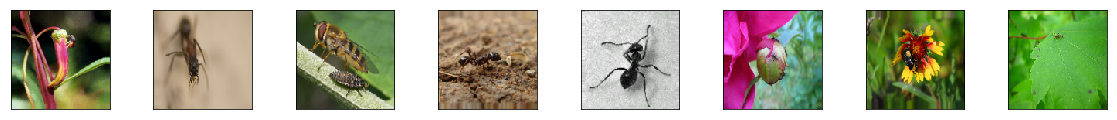

In [44]:
n = 8  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [45]:
############Model##################
input_img = Input(shape=(img_rows, img_cols, img_ch))

classifier = Sequential()
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu', 
                      input_shape = (img_rows, img_cols, img_ch)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))


classifier.summary()
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 62, 62, 64)        36928     
_________________________________________________________________
dropout_19 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
dropout_20 (Dropout)         (None, 29, 29, 128)       0         
__________

In [46]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
history = LossHistory()

In [47]:
history = classifier.fit_generator(
        train_generator,
        steps_per_epoch=((train_generator.samples))//batch_size,
        epochs=nepochs,verbose=1,
        validation_data=validation_generator,
        validation_steps= ((validation_generator.samples))// batch_size,callbacks=[history])


Epoch 1/500
7/7 [==============================] - 5s 643ms/step - loss: 0.8296 - acc: 0.5938 - val_loss: 0.6932 - val_acc: 0.5156
Epoch 2/500
7/7 [==============================] - 4s 507ms/step - loss: 0.6780 - acc: 0.5816 - val_loss: 0.6865 - val_acc: 0.5469
Epoch 3/500
7/7 [==============================] - 3s 499ms/step - loss: 0.6422 - acc: 0.6284 - val_loss: 0.6722 - val_acc: 0.6406
Epoch 4/500
7/7 [==============================] - 4s 521ms/step - loss: 0.6095 - acc: 0.6599 - val_loss: 0.6491 - val_acc: 0.6797
Epoch 5/500
7/7 [==============================] - 4s 562ms/step - loss: 0.6067 - acc: 0.6518 - val_loss: 0.6368 - val_acc: 0.7188
Epoch 6/500
7/7 [==============================] - 4s 507ms/step - loss: 0.5448 - acc: 0.7271 - val_loss: 0.6298 - val_acc: 0.6016
Epoch 7/500
7/7 [==============================] - 3s 487ms/step - loss: 0.5815 - acc: 0.6500 - val_loss: 0.6726 - val_acc: 0.5625
Epoch 8/500
7/7 [==============================] - 4s 501ms/step - loss: 0.5541 - a

7/7 [==============================] - 3s 482ms/step - loss: 0.0506 - acc: 0.9752 - val_loss: 0.9643 - val_acc: 0.7266
Epoch 64/500
7/7 [==============================] - 3s 478ms/step - loss: 0.0876 - acc: 0.9865 - val_loss: 1.0411 - val_acc: 0.7188
Epoch 65/500
7/7 [==============================] - 3s 466ms/step - loss: 0.1081 - acc: 0.9820 - val_loss: 1.0248 - val_acc: 0.6875
Epoch 66/500
7/7 [==============================] - 4s 530ms/step - loss: 0.1396 - acc: 0.9683 - val_loss: 1.3359 - val_acc: 0.6484
Epoch 67/500
7/7 [==============================] - 4s 508ms/step - loss: 0.3367 - acc: 0.9322 - val_loss: 1.0451 - val_acc: 0.6484
Epoch 68/500
7/7 [==============================] - 3s 498ms/step - loss: 0.1576 - acc: 0.9509 - val_loss: 0.7137 - val_acc: 0.7266
Epoch 69/500
7/7 [==============================] - 4s 510ms/step - loss: 0.1344 - acc: 0.9640 - val_loss: 0.8419 - val_acc: 0.6719
Epoch 70/500
7/7 [==============================] - 4s 502ms/step - loss: 0.1453 - acc: 0

Epoch 125/500
7/7 [==============================] - 4s 530ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.2064 - val_acc: 0.7031
Epoch 126/500
7/7 [==============================] - 3s 497ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.2606 - val_acc: 0.6953
Epoch 127/500
7/7 [==============================] - 4s 514ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.2323 - val_acc: 0.7031
Epoch 128/500
7/7 [==============================] - 3s 498ms/step - loss: 0.0185 - acc: 0.9955 - val_loss: 1.1441 - val_acc: 0.7500
Epoch 129/500
7/7 [==============================] - 3s 482ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 1.2114 - val_acc: 0.7422
Epoch 130/500
7/7 [==============================] - 4s 559ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.2435 - val_acc: 0.7266
Epoch 131/500
7/7 [==============================] - 4s 560ms/step - loss: 0.0253 - acc: 0.9932 - val_loss: 1.4566 - val_acc: 0.6719
Epoch 132/500
7/7 [==============================] - 4s 551ms/step - 

7/7 [==============================] - 4s 525ms/step - loss: 0.1603 - acc: 0.9554 - val_loss: 0.9442 - val_acc: 0.6641
Epoch 187/500
7/7 [==============================] - 3s 492ms/step - loss: 0.0473 - acc: 0.9886 - val_loss: 1.0006 - val_acc: 0.6797
Epoch 188/500
7/7 [==============================] - 3s 497ms/step - loss: 0.0802 - acc: 0.9775 - val_loss: 0.9249 - val_acc: 0.7109
Epoch 189/500
7/7 [==============================] - 4s 601ms/step - loss: 0.0221 - acc: 0.9911 - val_loss: 1.0079 - val_acc: 0.6875
Epoch 190/500
7/7 [==============================] - 4s 562ms/step - loss: 0.0549 - acc: 0.9865 - val_loss: 1.0395 - val_acc: 0.7031
Epoch 191/500
7/7 [==============================] - 4s 540ms/step - loss: 0.0194 - acc: 0.9955 - val_loss: 1.1808 - val_acc: 0.6719
Epoch 192/500
7/7 [==============================] - 4s 580ms/step - loss: 0.0294 - acc: 0.9865 - val_loss: 1.3090 - val_acc: 0.6250
Epoch 193/500
7/7 [==============================] - 3s 472ms/step - loss: 0.0192 -

7/7 [==============================] - 3s 498ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.3022 - val_acc: 0.7031
Epoch 248/500
7/7 [==============================] - 3s 486ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 1.3332 - val_acc: 0.6797
Epoch 249/500
7/7 [==============================] - 3s 481ms/step - loss: 0.0165 - acc: 0.9955 - val_loss: 1.3694 - val_acc: 0.6875
Epoch 250/500
7/7 [==============================] - 4s 538ms/step - loss: 0.0091 - acc: 0.9955 - val_loss: 1.4324 - val_acc: 0.6797
Epoch 251/500
7/7 [==============================] - 4s 554ms/step - loss: 0.0070 - acc: 1.0000 - val_loss: 1.4608 - val_acc: 0.6797
Epoch 252/500
7/7 [==============================] - 4s 526ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.4599 - val_acc: 0.6797
Epoch 253/500
7/7 [==============================] - 4s 550ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.5324 - val_acc: 0.6797
Epoch 254/500
7/7 [==============================] - 4s 508ms/step - loss: 0.0081 -

7/7 [==============================] - 4s 521ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.3524 - val_acc: 0.7109
Epoch 309/500
7/7 [==============================] - 3s 473ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.4143 - val_acc: 0.7188
Epoch 310/500
7/7 [==============================] - 4s 523ms/step - loss: 0.0076 - acc: 0.9955 - val_loss: 1.2680 - val_acc: 0.7031
Epoch 311/500
7/7 [==============================] - 4s 503ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.3062 - val_acc: 0.6797
Epoch 312/500
7/7 [==============================] - 3s 481ms/step - loss: 0.0079 - acc: 0.9955 - val_loss: 1.3597 - val_acc: 0.7344
Epoch 313/500
7/7 [==============================] - 3s 465ms/step - loss: 0.0193 - acc: 0.9955 - val_loss: 1.4510 - val_acc: 0.7344
Epoch 314/500
7/7 [==============================] - 4s 538ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.4392 - val_acc: 0.7109
Epoch 315/500
7/7 [==============================] - 4s 522ms/step - loss: 0.0087 -

7/7 [==============================] - 3s 493ms/step - loss: 0.0266 - acc: 0.9887 - val_loss: 1.4392 - val_acc: 0.6953
Epoch 370/500
7/7 [==============================] - 4s 593ms/step - loss: 0.1163 - acc: 0.9707 - val_loss: 1.4235 - val_acc: 0.7422
Epoch 371/500
7/7 [==============================] - 4s 539ms/step - loss: 0.0811 - acc: 0.9730 - val_loss: 1.5965 - val_acc: 0.6641
Epoch 372/500
7/7 [==============================] - 4s 518ms/step - loss: 0.0993 - acc: 0.9688 - val_loss: 1.7454 - val_acc: 0.6172
Epoch 373/500
7/7 [==============================] - 3s 490ms/step - loss: 0.1778 - acc: 0.9636 - val_loss: 1.3140 - val_acc: 0.6406
Epoch 374/500
7/7 [==============================] - 4s 515ms/step - loss: 0.2093 - acc: 0.9152 - val_loss: 1.0010 - val_acc: 0.6250
Epoch 375/500
7/7 [==============================] - 4s 515ms/step - loss: 0.1217 - acc: 0.9504 - val_loss: 1.2669 - val_acc: 0.6016
Epoch 376/500
7/7 [==============================] - 3s 500ms/step - loss: 0.1257 -

7/7 [==============================] - 4s 507ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.5085 - val_acc: 0.6797
Epoch 431/500
7/7 [==============================] - 3s 488ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.4591 - val_acc: 0.6875
Epoch 432/500
7/7 [==============================] - 3s 497ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.4756 - val_acc: 0.6875
Epoch 433/500
7/7 [==============================] - 3s 469ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.5155 - val_acc: 0.6953
Epoch 434/500
7/7 [==============================] - 4s 523ms/step - loss: 6.8098e-04 - acc: 1.0000 - val_loss: 1.5474 - val_acc: 0.7109
Epoch 435/500
7/7 [==============================] - 4s 538ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.5568 - val_acc: 0.6953
Epoch 436/500
7/7 [==============================] - 3s 488ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.5659 - val_acc: 0.6875
Epoch 437/500
7/7 [==============================] - 4s 514ms/step - loss: 6.31

7/7 [==============================] - 4s 545ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 1.8246 - val_acc: 0.6484
Epoch 492/500
7/7 [==============================] - 4s 508ms/step - loss: 0.0393 - acc: 0.9955 - val_loss: 1.6619 - val_acc: 0.6406
Epoch 493/500
7/7 [==============================] - 4s 513ms/step - loss: 0.0149 - acc: 0.9955 - val_loss: 1.4155 - val_acc: 0.6641
Epoch 494/500
7/7 [==============================] - 4s 503ms/step - loss: 0.0086 - acc: 0.9955 - val_loss: 1.6490 - val_acc: 0.6484
Epoch 495/500
7/7 [==============================] - 4s 506ms/step - loss: 0.0166 - acc: 0.9955 - val_loss: 1.6244 - val_acc: 0.6875
Epoch 496/500
7/7 [==============================] - 3s 482ms/step - loss: 0.0069 - acc: 1.0000 - val_loss: 1.4868 - val_acc: 0.6875
Epoch 497/500
7/7 [==============================] - 3s 482ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.5235 - val_acc: 0.6875
Epoch 498/500
7/7 [==============================] - 4s 563ms/step - loss: 0.0020 -

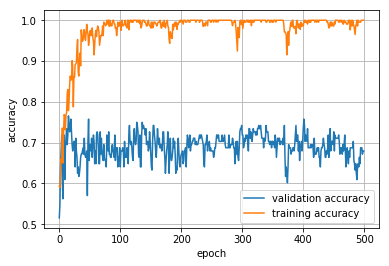

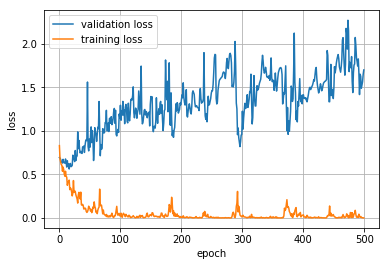

In [48]:

############Plot Accuracy and Loss over Epochs######
plt.plot(history.epoch,history.history['val_acc'],label='validation accuracy')
plt.plot(history.epoch,history.history['acc'],label='training accuracy')
plt.legend(loc=0)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

#############
plt.plot(history.epoch,history.history['val_loss'],label='validation loss')
plt.plot(history.epoch,history.history['loss'],label='training loss')
plt.legend(loc=0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()
